Epoch 1/100
409/409 [==============================] - 1s 2ms/step - loss: 33126092800.0000 - val_loss: 7706799104.0000
Epoch 2/100
409/409 [==============================] - 1s 2ms/step - loss: 6533557248.0000 - val_loss: 5198206976.0000
Epoch 3/100
409/409 [==============================] - 1s 2ms/step - loss: 5378109952.0000 - val_loss: 4712412672.0000
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 5019537920.0000 - val_loss: 4494787584.0000
Epoch 5/100
409/409 [==============================] - 1s 2ms/step - loss: 4941418496.0000 - val_loss: 4403649024.0000
Epoch 6/100
409/409 [==============================] - 1s 2ms/step - loss: 4936038400.0000 - val_loss: 4333896192.0000
Epoch 7/100
409/409 [==============================] - 1s 2ms/step - loss: 4874938368.0000 - val_loss: 4294464768.0000
Epoch 8/100
409/409 [==============================] - 1s 2ms/step - loss: 4780185600.0000 - val_loss: 4289739776.0000
Epoch 9/100
409/409 [==========================

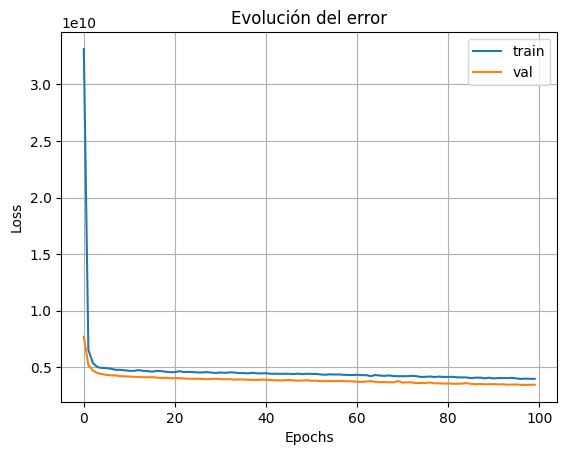

In [3]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from preprocessing import get_preprocessor
from tensorflow import keras
import matplotlib.pyplot as plt

# Cargar datos
housing = pd.read_csv("housing.csv")
housing = housing.dropna()

# Separar X e y
X = housing.drop("median_house_value", axis=1)
y = housing["median_house_value"].copy()

# División
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Preprocesamiento
preprocessor = get_preprocessor(housing)
X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

# Crear modelo mejorado
model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=X_train_prep.shape[1]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

# EarlyStopping
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Entrenar modelo
history = model.fit(X_train_prep, y_train, epochs=100,
                    validation_data=(X_valid_prep, y_valid),
                    callbacks=[early_stopping_cb])

# Evaluar
y_pred = model.predict(X_valid_prep)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("RMSE validación:", rmse)

# Visualización
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Evolución del error")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()
